In [1]:
import pandas as pd
test=pd.read_csv('test.csv')
train =pd.read_csv('train.csv')

In [2]:
def size(w,h):
    return w*h

train['slot_size']=size(train['slotwidth'],train['slotheight'])


In [ ]:
tags=pd.read_csv('train_tags')

In [3]:
train_click = train[['click','advertiser','weekday','hour','region','city','adexchange','usertag','slot_size','useragent'
                    ,'bidprice','payprice']]

In [4]:
train_click.insert(0, 'Imps', 0)

In [5]:
train_click.head()

,Imps,click,advertiser,weekday,hour,region,city,adexchange,usertag,slot_size,useragent,bidprice,payprice
0,0,0,3427,5,22,2,2,2,null,40000,windows_ie,238,5
1,0,0,2821,1,20,238,239,1,null,75000,windows_chrome,294,23
2,0,0,3427,3,13,40,41,2,"10052,10006,13866,10110",62500,windows_ie,238,24
3,0,0,1458,6,23,1,1,1,"13866,10063,10111",96000,windows_ie,300,25
4,0,0,2259,5,6,216,233,2,null,65520,windows_ie,277,133


In [6]:
import numpy as np
#train_click['win']=np.zeros(len(train_click))

In [7]:
train_click.loc[train_click['bidprice']>=train_click['payprice'],['Imps']]=1

C:\Users\xinyi\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
train_click['cost']=train_click['Imps']*train_click['payprice']

C:\Users\xinyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
train_click.insert(0, 'Count', 1)

In [10]:
advertiser =train_click.groupby(['advertiser']).mean()
advertiser_total =train_click.groupby(['advertiser']).sum()

def stats(x,t):
    x['CTR']=t['click']/t['Imps']
    x['CPM']=t['cost']/(t['Imps']/1000)
    x['CPC']=t['cost']/t['click']
    x['total_Imps']=t['Imps']
    x['total_click']=t['click']
    x['total_cost']=t['cost']
    y=x[['CTR','CPM','CPC','payprice','total_Imps','total_click','total_cost']]
    return y

stats(advertiser,advertiser_total)


,CTR,CPM,CPC,payprice,total_Imps,total_click,total_cost
advertiser,,,,,,,
1458,0.000782,68992.645521,88230.483117,68.992646,492353,385,33968736
2259,0.000322,92974.931362,289028.790698,92.974931,133673,43,12428238
2261,0.000327,89662.183760,274271.638889,89.662184,110122,36,9873779
2821,0.000620,89077.921709,143725.526718,89.077922,211366,131,18828044
2997,0.004355,62800.116398,14420.585253,62.800116,49829,217,3129267
3358,0.000762,84720.598892,111124.905941,84.720599,264956,202,22447231
3386,0.000703,76766.319958,109161.946875,76.766320,455041,320,34931823
3427,0.000675,75616.328952,111980.555147,75.616329,402806,272,30458711
3476,0.000602,76950.082841,127907.909091,76.950083,310835,187,23918779


In [21]:
train_click['click'].sum()

1793

In [54]:
from scipy import stats
import matplotlib.pyplot as plt

In [172]:
import numpy as np
train_click['CTR']=train_click['click']/train_click['Imps']
advertisers=np.unique(train_click['advertiser'])
advertisers_sem=[]
for i in advertisers:
    advertisers_sem.append(stats.sem(train_click[train_click['advertiser']==i]['CTR']))
p_advertisers_sem=[]
for i in advertisers:
    p_advertisers_sem.append(stats.sem(train_click[train_click['advertiser']==i]['payprice']))
p_advertisers_sem

C:\Users\xinyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[0.07625735221012081,
 0.20311843532343124,
 0.23172837593671775,
 0.16018775403903837,
 0.2717851330351983,
 0.1074089196065992,
 0.09051840671215017,
 0.07861174642846612,
 0.09822578357997022]

In [171]:
weekdays=np.unique(train_click['weekday'])
weekdays_sem=[]
for i in weekdays:
    weekdays_sem.append(stats.sem(train_click[train_click['weekday']==i]['CTR']))
p_weekdays_sem=[]
for i in weekdays:
    p_weekdays_sem.append(stats.sem(train_click[train_click['weekday']==i]['payprice']))
p_weekdays_sem

[0.09757855175900816,
 0.10376169020236232,
 0.10770849851265833,
 0.09513238659836097,
 0.0987691647676287,
 0.10233273774036085,
 0.10341509713638546]

In [173]:
hours=np.unique(train_click['hour'])
hours_sem=[]
for i in hours:
    hours_sem.append(stats.sem(train_click[train_click['hour']==i]['CTR']))
p_hours_sem=[]
for i in hours:
    p_hours_sem.append(stats.sem(train_click[train_click['hour']==i]['payprice']))
p_hours_sem

[0.14777242396438195,
 0.23298219621292476,
 0.29318912809034403,
 0.3129239323483095,
 0.42306797170585,
 0.4199832560480951,
 0.39199004713432267,
 0.27263505488640516,
 0.23361635201592948,
 0.20048367698126907,
 0.16526942498453578,
 0.1652334072753695,
 0.16738443565250707,
 0.1578942832420856,
 0.16518703401064203,
 0.1561443612796099,
 0.157168603475715,
 0.16064544453957258,
 0.15811067964008985,
 0.17373664902958094,
 0.17272800330285726,
 0.1829794071404252,
 0.15008086745475077,
 0.16506268387632778]

In [174]:
regions=np.unique(train_click['region'])
regions_sem=[]
for i in regions:
    regions_sem.append(stats.sem(train_click[train_click['region']==i]['CTR']))
p_regions_sem=[]
for i in regions:
    p_regions_sem.append(stats.sem(train_click[train_click['region']==i]['payprice']))
p_regions_sem

[0.2764090713379671,
 0.1817689791990359,
 0.29274405200071685,
 0.17307756485579234,
 0.22519431119926975,
 0.3221745685357931,
 0.19454204743756023,
 0.24797758923363772,
 0.25336307928235957,
 0.24673215776728552,
 0.14051827956112553,
 0.1631838700962772,
 0.228686436059528,
 0.2223120647051947,
 0.2650743683930804,
 0.14155180545759688,
 0.17955387020421085,
 0.20269474972041354,
 0.23925542333185248,
 0.10315377212329717,
 0.2437562507996051,
 0.5495745313066437,
 0.2668764033482732,
 0.16051198499944375,
 0.39146714891678014,
 0.33643810052343526,
 1.8936127700415564,
 0.21700830555383943,
 0.3570034466165307,
 0.7219520983038434,
 0.5857223121219363,
 0.3135581546537822,
 0.4817181864447122,
 0.7004727325758187,
 1.9330300280621493]

In [39]:
def split(text):
    return text.split("_")
train_click['user'], train_click['agent'] = \
zip(*train_click['useragent'].apply(lambda x: split(x)))

C:\Users\xinyi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
adexchanges=np.unique(train_click['adexchange'])
adexchanges_sem=[]
for i in adexchanges:
    adexchanges_sem.append(stats.sem(train_click[train_click['adexchange']==i]['CTR']))
p_adexchanges_sem=[]
for i in adexchanges:
    p_adexchanges_sem.append(stats.sem(train_click[train_click['adexchange']==i]['payprice']))
p_adexchanges_sem

[0.07796231620459083,
 0.07546031913108374,
 0.048944650952009436,
 0.19029966551098915,
 0.2717851330351983]

In [176]:
slot_sizes=np.unique(train_click['slot_size'])
slot_sizes_sem=[]
for i in slot_sizes:
    slot_sizes_sem.append(stats.sem(train_click[train_click['slot_size']==i]['CTR']))
p_slot_sizes_sem=[]
for i in slot_sizes:
    p_slot_sizes_sem.append(stats.sem(train_click[train_click['slot_size']==i]['payprice']))
p_slot_sizes_sem

[2.569794813162078,
 8.270857190172796,
 0.2717851330351983,
 3.7810788154773887,
 0.32404996328341495,
 0.25809706476719346,
 1.7365531973488888,
 0.5494044720612886,
 0.24389490154178248,
 4.582102441981532,
 1.270072986032267,
 0.18209870777389045,
 0.10332903202419003,
 2.580413569729674,
 0.46354607583295826,
 0.08441423859257186,
 5.015556001137151,
 0.8563426975590137,
 0.1873781362911831,
 0.1381607403998607,
 0.9721731036447637,
 0.04977645498325855,
 0.12495987056355207,
 0.17882205480410146,
 0.6307860496460114,
 10.106521651306016]

In [177]:
users=np.unique(train_click['user'])
users_sem=[]
for i in users:
    users_sem.append(stats.sem(train_click[train_click['user']==i]['CTR']))
p_users_sem=[]
for i in users:
    p_users_sem.append(stats.sem(train_click[train_click['user']==i]['payprice']))
p_users_sem

[0.24394854543834132,
 2.935009751647721,
 1.5716548972714712,
 0.26677721407112476,
 1.3343015069765385,
 0.03930452500135002]

In [178]:
agents=np.unique(train_click['agent'])
agents_sem=[]
for i in agents:
    agents_sem.append(stats.sem(train_click[train_click['agent']==i]['CTR']))
p_agents_sem=[]
for i in agents:
    p_agents_sem.append(stats.sem(train_click[train_click['agent']==i]['payprice']))
p_agents_sem

[0.06776815427708942,
 0.4033355856203503,
 0.04906752487149356,
 0.7169705777747514,
 1.1624590934608559,
 0.3976899205140543,
 0.19033840953340236,
 13.432409386316717,
 0.4913721183851372]

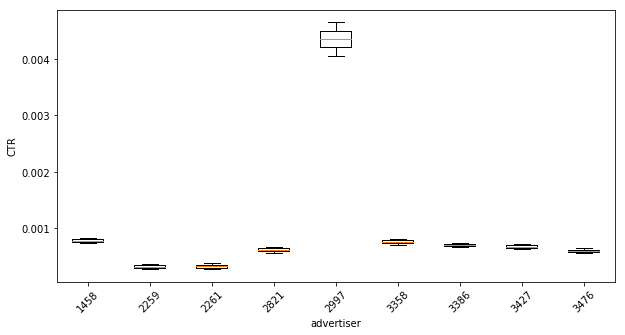

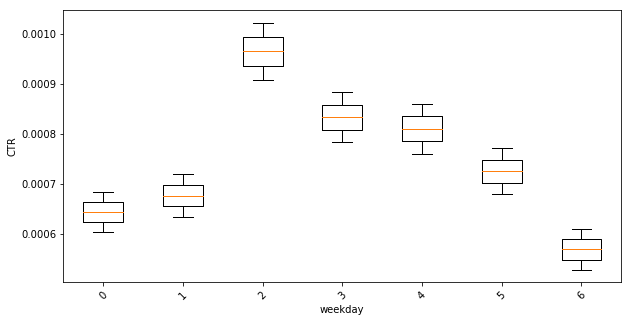

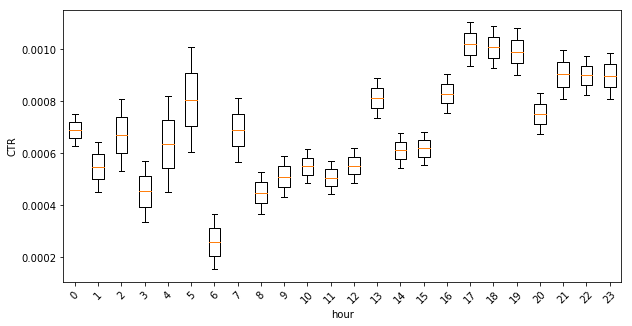

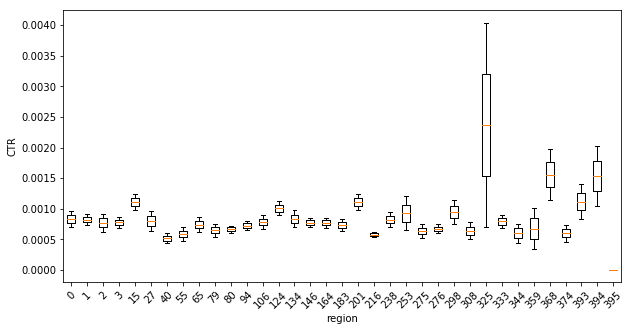

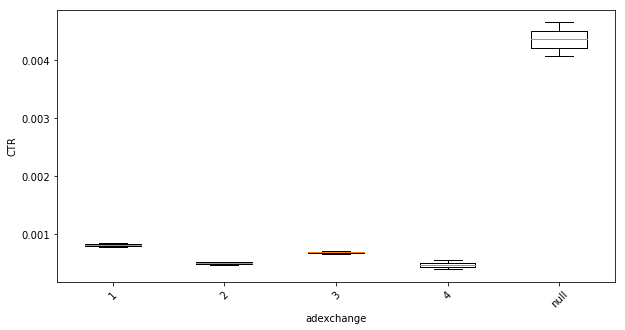

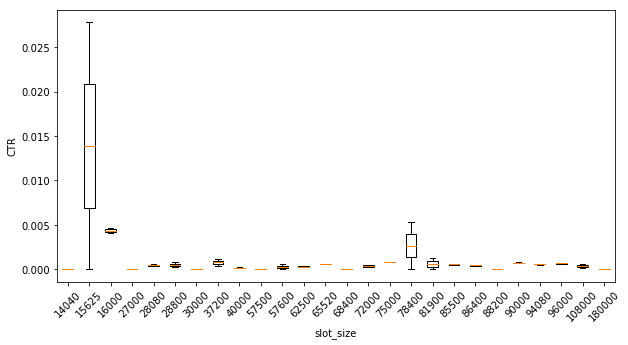

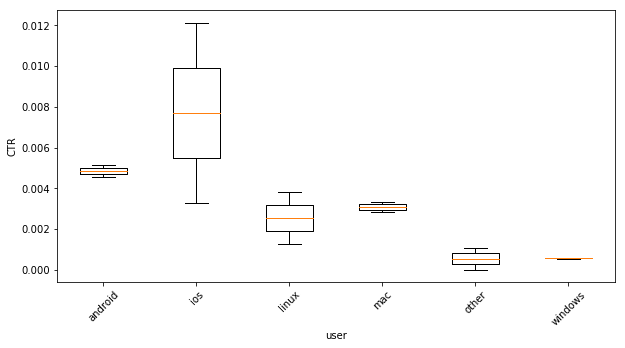

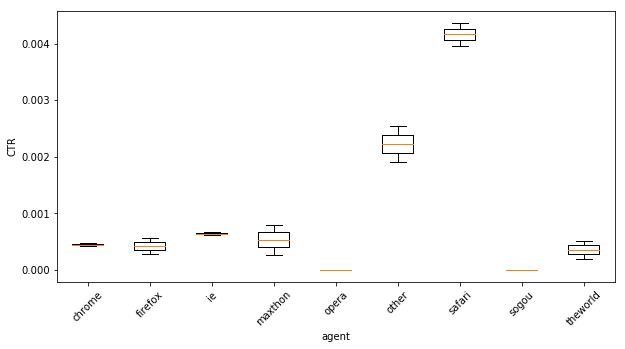

In [148]:
features=['advertiser','weekday','hour','region','adexchange','slot_size','user','agent']
sems=[advertisers_sem,weekdays_sem,hours_sem,regions_sem,adexchanges_sem,slot_sizes_sem,users_sem,agents_sem]
label=[advertisers,weekdays,hours,regions,adexchanges,slot_sizes,users,agents]
for i in range(8):
    advertiser_feedback=train_click.groupby(features[i]).mean()[['CTR']]
    advertiser_feedback['sem']=sems[i]
    advertiser_feedback['low']=advertiser_feedback['CTR']-advertiser_feedback['sem']
    advertiser_feedback['high']=advertiser_feedback['CTR']+advertiser_feedback['sem']
    advertiser_feedback=advertiser_feedback[['CTR','low','high']]
    a=[]
    for j in range(len(advertiser_feedback)):
        a.append([advertiser_feedback.iloc[j]])
    plt.figure(figsize=(10,5))
    plt.boxplot(a)
    plt.xticks(range(1,len(label[i])+1),label[i],rotation=45)
    plt.xlabel(features[i])
    plt.ylabel('CTR')
    plt.show()

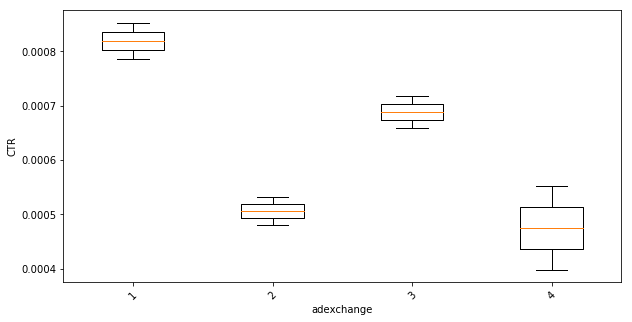

In [166]:
advertiser_feedback=train_click.groupby('adexchange').mean()[['CTR']]
advertiser_feedback['sem']=adexchanges_sem
advertiser_feedback['low']=advertiser_feedback['CTR']-advertiser_feedback['sem']
advertiser_feedback['high']=advertiser_feedback['CTR']+advertiser_feedback['sem']
advertiser_feedback=advertiser_feedback[['CTR','low','high']]
a=[]
for j in range(len(advertiser_feedback)-1):
    a.append([advertiser_feedback.iloc[j]])
plt.figure(figsize=(10,5))
plt.boxplot(a)
plt.xticks(range(1,len(adexchanges)+1),adexchanges,rotation=45)
plt.xlabel('adexchange')
plt.ylabel('CTR')
plt.show()

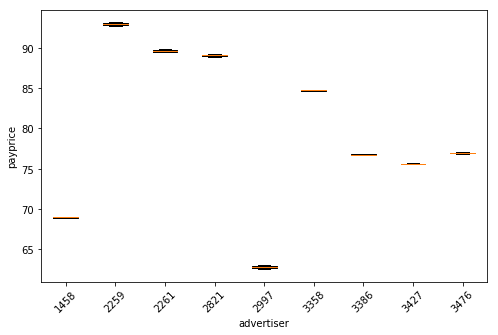

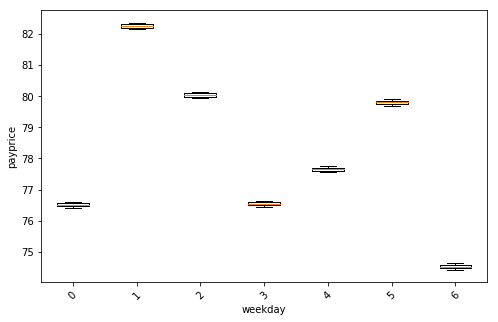

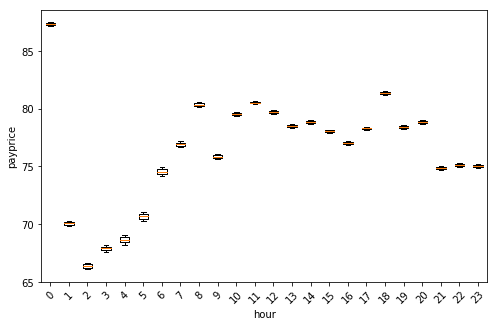

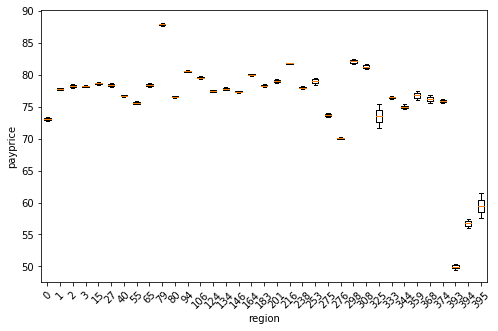

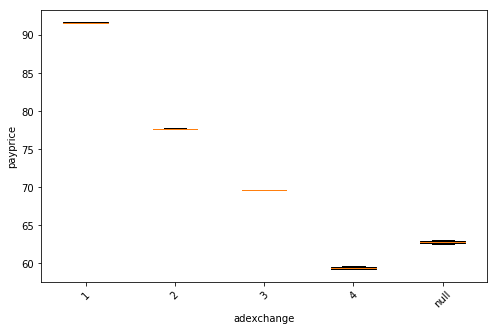

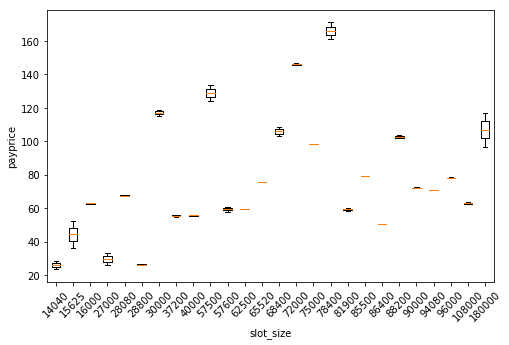

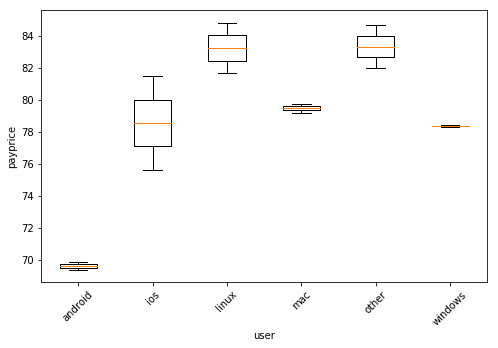

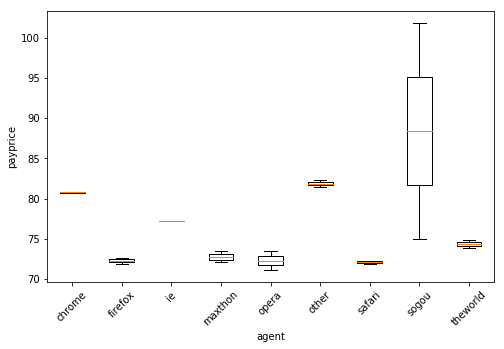

In [180]:
features=['advertiser','weekday','hour','region','adexchange','slot_size','user','agent']
p_sems=[p_advertisers_sem,p_weekdays_sem,p_hours_sem,p_regions_sem,p_adexchanges_sem,p_slot_sizes_sem,p_users_sem,p_agents_sem]
label=[advertisers,weekdays,hours,regions,adexchanges,slot_sizes,users,agents]
for i in range(8):
    advertiser_feedback=train_click.groupby(features[i]).mean()[['payprice']]
    advertiser_feedback['sem']=p_sems[i]
    advertiser_feedback['low']=advertiser_feedback['payprice']-advertiser_feedback['sem']
    advertiser_feedback['high']=advertiser_feedback['payprice']+advertiser_feedback['sem']
    advertiser_feedback=advertiser_feedback[['payprice','low','high']]
    a=[]
    for j in range(len(advertiser_feedback)):
        a.append([advertiser_feedback.iloc[j]])
    plt.figure(figsize=(8,5))
    plt.boxplot(a)
    plt.xticks(range(1,len(label[i])+1),label[i],rotation=45)
    plt.xlabel(features[i])
    plt.ylabel('payprice')
    plt.show()